In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

data = pd.read_csv('/content/drive/MyDrive/Datasets/filename.csv')
print(data.head())

                    id      conversation_id               created_at  \
0  1566959608350097408  1566959608350097408  2022-09-06 01:20:57 UTC   
1  1566959603459723267  1566897226047258626  2022-09-06 01:20:56 UTC   
2  1566959603098992640  1566947129653751808  2022-09-06 01:20:56 UTC   
3  1566959601106427908  1566953744834727936  2022-09-06 01:20:56 UTC   
4  1566959599001149440  1566759242480189441  2022-09-06 01:20:55 UTC   

         date      time  timezone              user_id         username  \
0  2022-09-06  01:20:57         0  1029052626644754432  kingzac44573212   
1  2022-09-06  01:20:56         0           1424450960       back9press   
2  2022-09-06  01:20:56         0  1518777144989536256    billh03918622   
3  2022-09-06  01:20:56         0            269821418     marcuspradel   
4  2022-09-06  01:20:55         0  1548898265420025858       kamavalvet   

                           name place  ... geo source user_rt_id user_rt  \
0                     KingFraam   NaN  .

In [2]:
print(data.columns)

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')


In [3]:
data = data[["username", "tweet", "language"]]

In [4]:
data.isnull().sum()

username    0
tweet       0
language    0
dtype: int64

In [5]:
data["language"].value_counts()

en     8745
pt      574
it      249
qme      96
in       57
und      44
ja       27
es       27
ca       23
no       19
de       16
fi       14
fr       14
ru       13
qht      11
nl       10
zh        9
vi        9
uk        6
ro        6
tl        6
qam       5
el        4
hi        4
th        4
et        4
pl        4
ur        3
tr        2
ar        2
sv        2
eu        1
ko        1
da        1
cs        1
my        1
lt        1
ht        1
Name: language, dtype: int64

In [6]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword = set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["tweet"] = data["tweet"].apply(clean)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


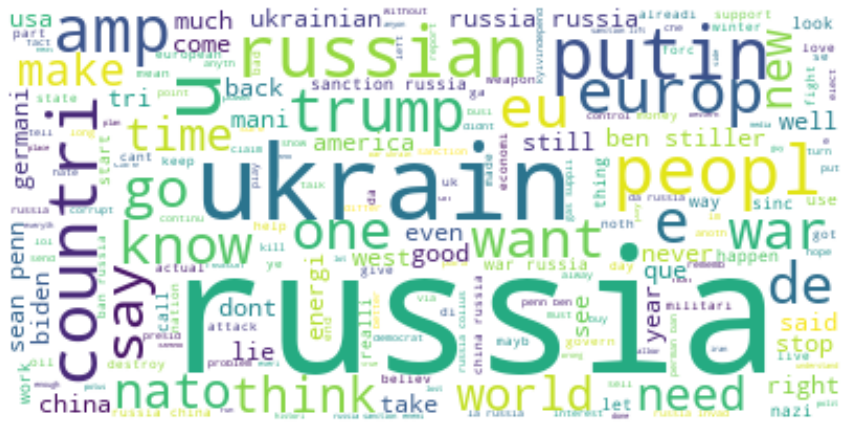

In [7]:
text = " ".join(i for i in data.tweet)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [8]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["tweet"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["tweet"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["tweet"]]
data = data[["tweet", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


                                               tweet  Positive  Negative  \
0  also europ could transit oil like russian oil ...     0.122     0.000   
1  hofercindi itsjefftiedrich collid russia nope ...     0.192     0.000   
2  repadamschiff that realli rich come guy lie am...     0.247     0.000   
3   earth futur day like last week oil start clim...     0.185     0.000   
4  mfarussia rusembnz enforumvostok midvladivosto...     0.000     0.207   

   Neutral  
0    0.878  
1    0.808  
2    0.753  
3    0.815  
4    0.793  


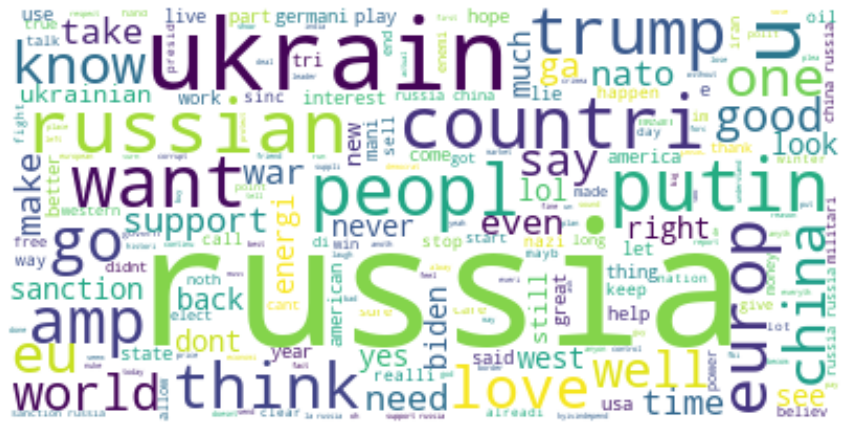

In [9]:
positive = ' '.join([i for i in data['tweet'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

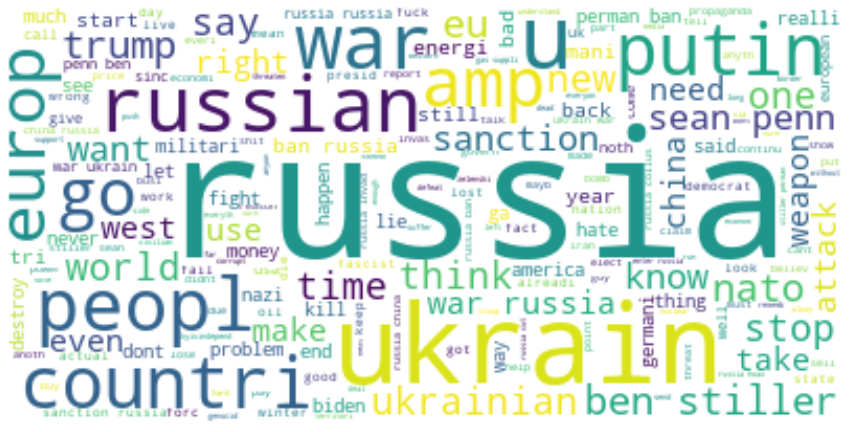

In [11]:
negative =' '.join([i for i in data['tweet'][data['Negative'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
print(wordcloud)

In [12]:
print(wordcloud)